In [117]:
%matplotlib inline

In [118]:
import numpy as np
from numpy import pi

import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler


color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6],dpi=300)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)

In [119]:
from scipy.io import mmread

In [120]:
D = mmread('test_damping_0_0.mtx')
K = mmread('test_stiffness_0_0.mtx')

(<Figure size 810x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc356f3bd68>)

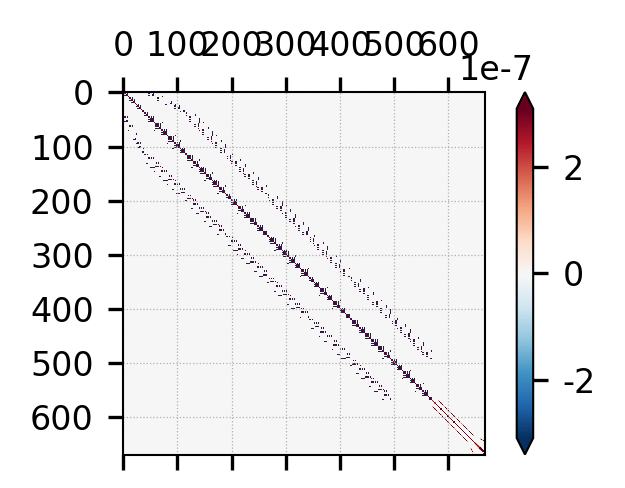

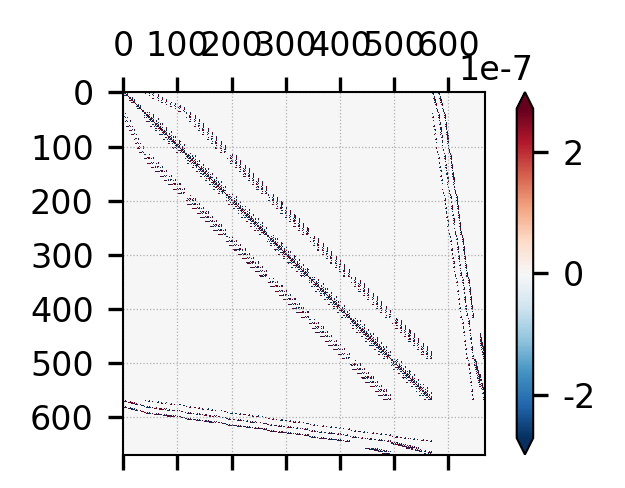

In [121]:
# plot the structure of the matrix
def matplot(M,frac=0.2) :
    from matplotlib.pyplot import subplots, cm
    from numpy import max, abs
    lim = max(abs(M))*frac
    fig,ax = subplots()
    cax = ax.matshow(M,cmap=cm.RdBu_r,vmin=-lim,vmax=lim)
    fig.colorbar(cax,extend='both')
    return fig,ax

matplot(D.toarray(),1e-6)
matplot(K.toarray(),1e-6)

In [122]:
K.row,K.col,K.data

(array([  0,   0,   0, ..., 668, 668, 668], dtype=int32),
 array([  0,   1,   4, ..., 666, 667, 668], dtype=int32),
 array([ 1.69146687e-04,  3.29520690e-20, -4.77926322e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]))

(<Figure size 810x480 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc356d4d588>)

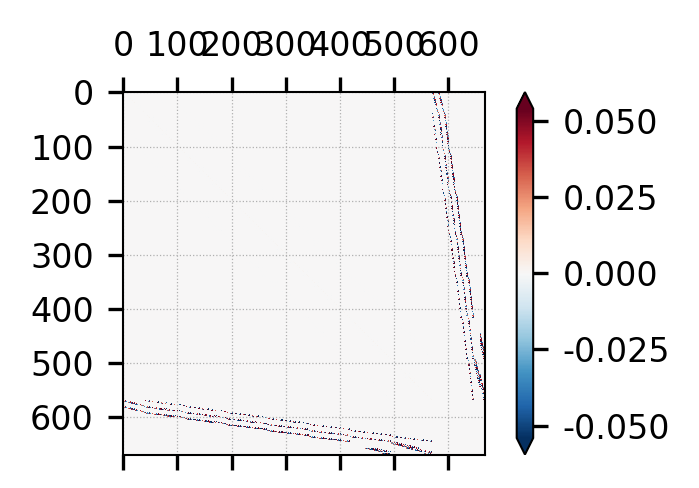

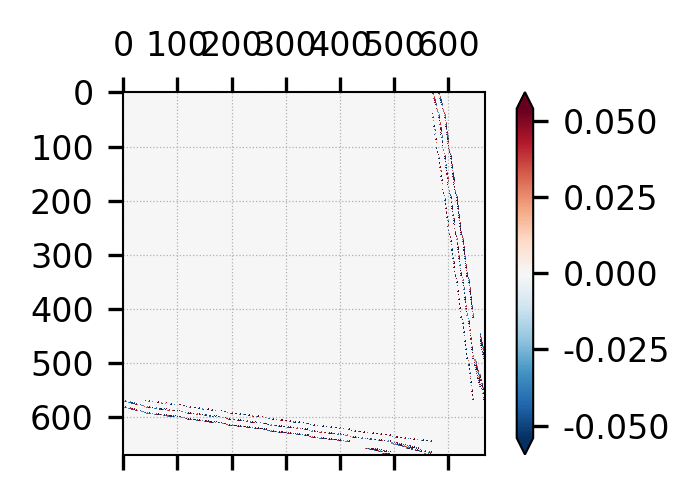

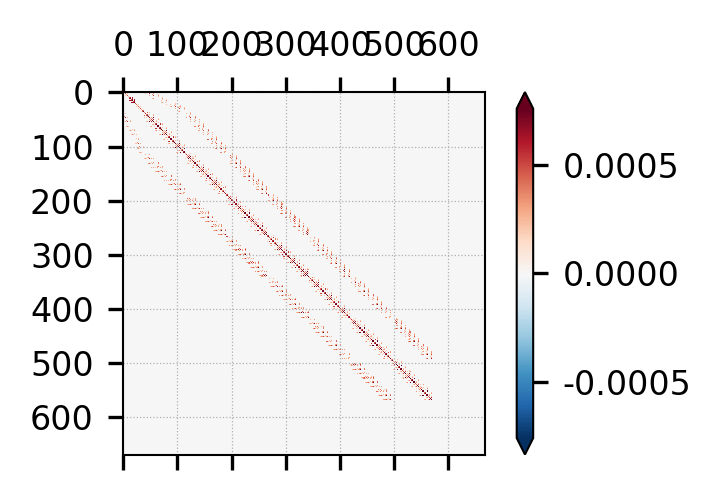

In [123]:
matplot(K.toarray())
matplot(K.toarray().T)
matplot(np.abs(K.toarray()+K.toarray().T))

In [124]:
from scipy.sparse.linalg import eigs, eigsh

/share/programs/anaconda/3/latest/lib/python3.6/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  self.workd[yslice] = self.OP(self.workd[xslice])
/share/programs/anaconda/3/latest/lib/python3.6/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:559: ComplexWarning: Casting complex values to real discards the imaginary part
  self.workd[yslice] = self.OPa(self.workd[Bxslice])


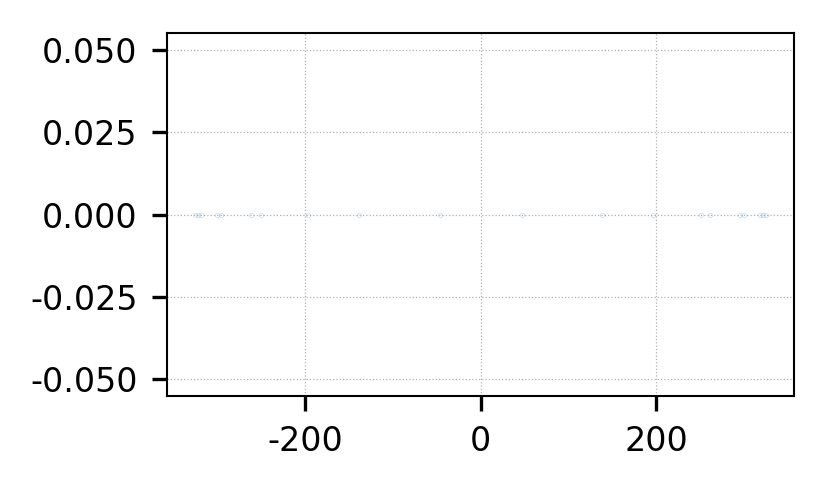

In [138]:
W,V = eigsh(K,M=D,k=20,sigma=1j*20*np.pi*2)
fig,ax=plt.subplots()
ax.plot(W.real,W.imag,'.',ms=0.1)

In [135]:
np.unique(np.round(np.abs(W),decimals=3))/2/np.pi

array([1.42395928, 1.47886773, 1.52693252, 2.02413257, 2.04721003,
       2.08763539, 2.15320723, 2.21671005, 2.52929036, 2.6626622 ,
       2.71772981, 2.80653827, 3.57923552, 3.69685102, 3.72931863,
       3.79807356, 3.90232005, 4.20471444, 4.24641304, 4.44838066])

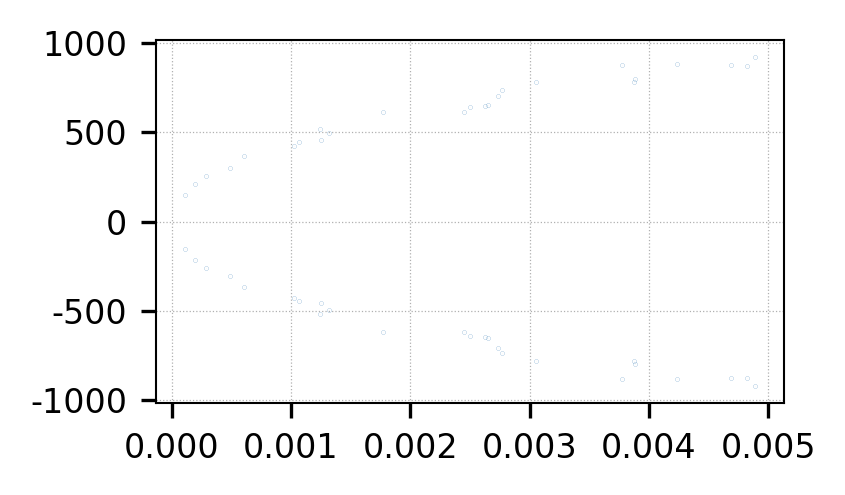

In [144]:
#W,V = eigs(K,M=D,k=200,which='LM') # good
W,V = eigs(K,M=D,k=50,sigma=1j*20*np.pi*2)
fig,ax=plt.subplots()
ax.plot(W.real,W.imag,'.',ms=0.1)

In [145]:
np.unique(np.round(np.abs(W.imag),decimals=3))/2/np.pi

array([ 24.0564288 ,  33.78095498,  40.97921475,  48.17572381,
        58.05685845,  67.73538885,  71.04963139,  72.61667095,
        78.94753628,  82.11758444,  97.92103367,  97.96909846,
       101.99969739, 102.57583829, 104.09290321, 112.1999377 ,
       117.42594941, 124.11252603, 124.54383593, 127.11418826,
       138.98412307, 139.34795127, 139.79835976, 140.18908514,
       146.73067161])

In [127]:
from scipy.linalg import eig
W,V = eig(K.toarray(),D.toarray())

(0, 0.01)

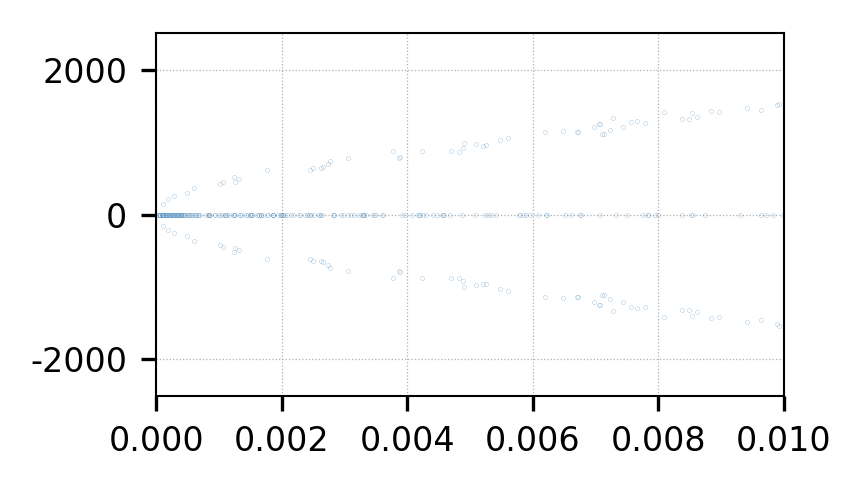

In [132]:
fig,ax=plt.subplots()
ax.plot(W.real,W.imag,'.',ms=0.1)
ax.set_xlim(0,0.01)

In [128]:
np.unique(np.round(np.abs(W.imag),decimals=3))/2/np.pi

array([  0.        ,  24.0564288 ,  33.78095498,  40.97921475,
        48.17572381,  58.05685845,  67.73538885,  71.04963139,
        72.61667095,  78.94753628,  82.11758444,  97.92103367,
        97.96909846, 101.99969739, 102.57583829, 104.09290321,
       112.1999377 , 117.42594941, 124.11252603, 124.54383593,
       127.11418826, 138.98412307, 139.34795127, 139.79835976,
       140.18908514, 146.73067161, 152.01986784, 153.3742764 ,
       155.80680055, 158.98544308, 165.0150281 , 168.31876641,
       177.14740941, 177.15106997, 181.24724074, 181.29387314,
       182.18052533, 184.30922269, 186.26269046, 192.93605723,
       193.7351742 , 200.02004374, 200.4854128 , 202.85984539,
       203.34717783, 207.11469364, 210.55705591, 210.66782775,
       213.47197869, 215.63871409, 223.39958658, 225.46159802,
       226.10872202, 228.60252082, 231.496276  , 236.34588627,
       241.19867964, 242.1715938 , 242.26692761, 243.04630937,
       245.21463632, 248.15247741, 251.95373407, 257.68

In [94]:
W.real

array([ 1.94002727e-02,  1.94002727e-02,  1.93486640e-02,  1.93486640e-02,
        1.91351651e-02,  1.91351651e-02,  1.90920194e-02,  1.90920194e-02,
        1.69530841e-02,  1.69530841e-02,  1.68099851e-02,  1.68099851e-02,
        1.59780988e-02,  1.59780988e-02,  1.62102082e-02,  1.62102082e-02,
        1.61533560e-02,  1.61533560e-02,  1.58465851e-02,  1.58465851e-02,
        1.45554564e-02,  1.45554564e-02,  1.45437322e-02,  1.45437322e-02,
        1.42512481e-02,  1.42512481e-02,  1.42629672e-02,  1.42629672e-02,
        1.35121866e-02,  1.35121866e-02,  1.35742555e-02,  1.35742555e-02,
        1.36662500e-02,  1.36662500e-02,  1.28426790e-02,  1.28426790e-02,
        1.28758837e-02,  1.28758837e-02,  1.22963591e-02,  1.22963591e-02,
        1.23668901e-02,  1.23668901e-02,  1.20694230e-02,  1.20694230e-02,
        1.24580314e-02,  1.24580314e-02,  1.24397571e-02,  1.24397571e-02,
        1.28858464e-02,  1.28858464e-02,  1.22016916e-02,  1.22016916e-02,
        1.12323971e-02,  

In [100]:
np.allclose(K.toarray().T,K.toarray())

False

In [102]:
np.allclose(D.toarray().T,D.toarray())

True

In [59]:
import h5py
from sys import path
path.append('/home/hhassanp/CFS/share/python/')
path.append('/home/flo/cfs/CFS/share/python/')
from hdf5_tools import get_centroids, get_result, get_coordinates, get_step_values

In [62]:
h5 = 'results_hdf5/test.cfs'
coord = get_coordinates(h5)
X = coord[::-1,:]
# resort everything
nprec = 6
# get grid vectors (the unique vectors of the x,y,z coodinate-grid)
x = np.unique(np.round(X[:,0],decimals=nprec))
y = np.unique(np.round(X[:,1],decimals=nprec))
z = np.unique(np.round(X[:,2],decimals=nprec))
print('Nx=',len(x))
print('Ny=',len(y))
print('Nz=',len(z))
# find nodes in grid
Xg,Yg,Zg  = np.meshgrid(x,y,z)
coord_s = np.array([Xg.ravel(),Yg.ravel(),Zg.ravel()]).T
Is = np.zeros([coord.shape[0]],dtype=int)
for i,(xi,yi,zi) in enumerate(coord_s):
    #print(np.array([coord[:,0]-x,coord[:,1]-y,coord[:,2]-z]).shape)
    #print(np.argwhere(np.abs(coord[:,0]-x)<=np.power(10,-nprec)))
    idx = np.argwhere(np.all(np.abs(np.array([X[:,0]-xi,X[:,1]-yi,X[:,2]-zi]))<=np.power(10.,-nprec),axis=0))
    if len(idx)==0 :
        print('error:',i,xi,yi,zi)
    else :
        Is[i] = idx[0][0]
        
# for the system matrix 
Im = np.array([Is*3,Is*3+1,Is*3+2]).T.ravel()


Nx= 11
Ny= 9
Nz= 1


In [81]:
# find the ones on the borger in Is
Ib = np.any(np.array([np.abs(X[Is,0]-x[0])<=np.power(10.,-nprec),
                 np.abs(X[Is,0]-x[-1])<=np.power(10.,-nprec),
                 np.abs(X[Is,1]-y[0])<=np.power(10.,-nprec),
                 np.abs(X[Is,1]-y[-1])<=np.power(10.,-nprec)]),axis=0)
Is[~Ib].shape

(63,)

In [84]:
63*2+len(Is),K.shape

(225, (669, 669))

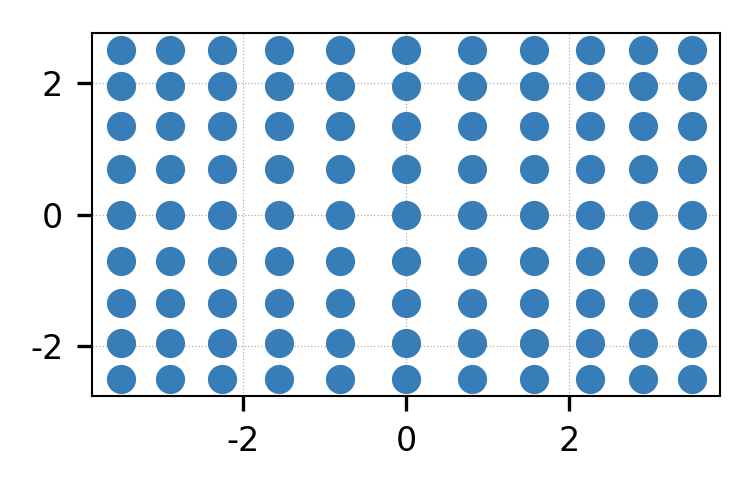

In [69]:
fig,ax = plt.subplots()
ax.plot(X[:,0],X[:,1],'o')

In [70]:
Is,Is.shape,K.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10,  9, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 21, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 31, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 43, 42, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 54, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 64, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 76, 75, 77, 79, 81, 83, 85, 87, 89, 91,
        93, 96, 95, 78, 80, 82, 84, 86, 88, 90, 92, 94, 97, 98]),
 (99,),
 (669, 669))